In [ ]:
"""
Purpose: To set up the tables that will 
be used for validation and to test the 
overall progress

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")

In [3]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-03-06 08:06:21,363 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-06 08:06:21,365 - settings - Setting database.user to celiib
INFO - 2021-03-06 08:06:21,366 - settings - Setting database.password to newceliipass
INFO - 2021-03-06 08:06:21,369 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-03-06 08:06:21,370 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-06 08:06:21,384 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-03-06 08:06:21,804 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-06 08:06:21,808 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-06 08:06:21,809 - settings - Setting database.user to celiib
INFO - 2021-03-06 08:06:21,810 - settings - Setting database.password to newceliipass
INFO - 2021-03-06 08:06:21,811 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-06 08:06:21,811 - settings - Setting database.user to celiib
INFO - 2021-03-06 08:06:21,812 - settings - Setting database.password to newceliipass
INFO - 2021-03-06 08:06:21,813 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-06 08:06:22,247 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-06 08:06:22,287 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-06 08:06:22,288 - settings - Setting database.user to celiib
INFO - 2021-03-06 08:06:22,289 - settings - Setting database.pa

In [4]:
from pathlib import Path
import numpy as np
import neuron_visualizations as nviz
import datajoint as dj

import proofreading_utils as pru
import classification_utils as clu

import neuron_utils as nru
import validation_utils as vu
import pandas as pd

In [5]:
import validation_utils as vu

# Inspecting the Proofread Cells for the Vallidation Set

In [7]:
minnie.AutoProofreadValidationNeurons3()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_length length (in um) of the classified axon skeleton,axon_area # area (in um^2) of the classified axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691135113167769,0,0.25,30.00,5,0,0,3,1,excitatory,densely_spined,1,1,1518.0422110411491,1628.0100161126834,335175,917.6,1,1,198908,188769,19783

In [8]:
segment_id = 864691135212632448

In [9]:
# du.plot_proofread_neuron(segment_id=segment_id,
#                        split_index=0,


#                       #for plotting the error faces
#                        plot_errored_faces=True,
#                        errored_faces_color=[1,0,0,0.2],

#                       #for plotting the synapse
#                       plot_synapses=True,
#                       synapse_scatter_size=0.3,
#                       valid_presyn_color="yellow",
#                       valid_postsyn_color="aqua",
#                       error_presyn_color="black",
#                       error_postsyn_color="orange",


#                       plot_nuclei=True,
#                       nuclei_color = "brown",
#                       nuclei_size = 1,#2500,
#                       nuclei_plot_type="scatter",#other option is mesh

#                       plot_paired_nuceli=False,
#                       paired_nuclei_color = "lime",

#                       plot_axon=True,
#                       validation = True,
                         
#                          plot_error_synapses=True,

#               verbose=False,
#                       )

# Calculating the Statistics For the Neuron Proofreading

In [17]:
len(pd.concat(validation_dfs_extens))

272160

Synapsse Results:
Total Number of Synapses = 3990
n_valid_syn_ids_presyn = 5
n_errored_syn_ids_presyn = 29
n_valid_syn_ids_postsyn = 3891
n_errored_syn_ids_postsyn = 65
Synapsse Results:
Total Number of Synapses = 4434
n_valid_syn_ids_presyn = 39
n_errored_syn_ids_presyn = 482
n_valid_syn_ids_postsyn = 3898
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 923
n_valid_syn_ids_presyn = 13
n_errored_syn_ids_presyn = 153
n_valid_syn_ids_postsyn = 753
n_errored_syn_ids_postsyn = 4
Synapsse Results:
Total Number of Synapses = 4361
n_valid_syn_ids_presyn = 86
n_errored_syn_ids_presyn = 621
n_valid_syn_ids_postsyn = 3649
n_errored_syn_ids_postsyn = 5
Synapsse Results:
Total Number of Synapses = 3452
n_valid_syn_ids_presyn = 76
n_errored_syn_ids_presyn = 345
n_valid_syn_ids_postsyn = 3007
n_errored_syn_ids_postsyn = 24
Synapsse Results:
Total Number of Synapses = 3190
n_valid_syn_ids_presyn = 18
n_errored_syn_ids_presyn = 89
n_valid_syn_ids_postsyn = 3081
n_errored_sy

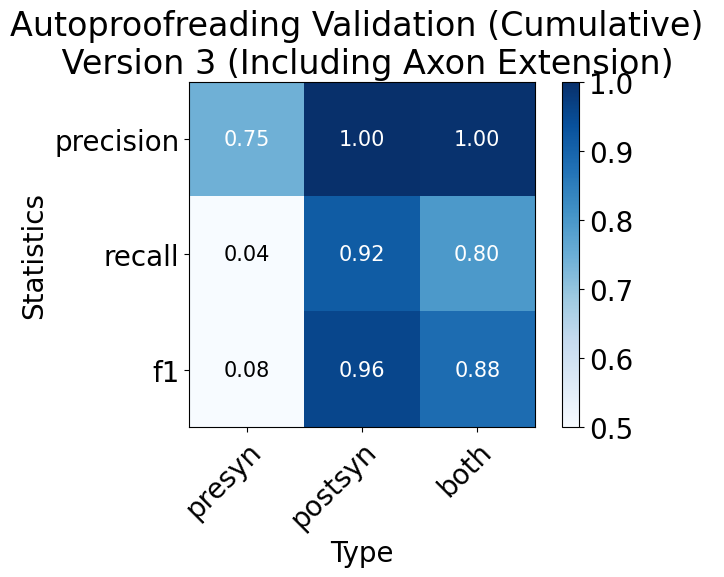

In [20]:
segment_ids = du.proofreading_stats_table(validation=True).fetch("segment_id")

validation_dfs_extens = [vu.synapse_validation_df_single_neuron(k,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=True) for k in segment_ids]

validation_dfs_combined = pd.concat(validation_dfs_extens)

vu.synapse_validation_df_to_score_plot(validation_dfs_combined,
                                      title_append=" (Including Axon Extension)")

INFO - 2021-03-13 03:01:39,683 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-13 03:01:39,684 - settings - Setting database.user to celiib
INFO - 2021-03-13 03:01:39,684 - settings - Setting database.password to newceliipass
INFO - 2021-03-13 03:01:39,867 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-13 03:01:40,399 - settings - Setting enable_python_native_blobs to True
WARNING - 2021-03-13 03:01:40,844 - font_manager - findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


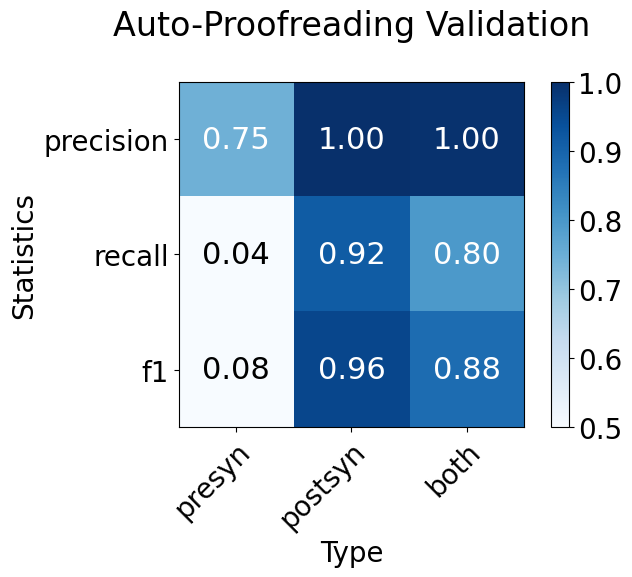

In [24]:
vu.synapse_validation_df_to_score_plot(validation_dfs_combined,
                                      title_append="")

In [18]:
len(pd.concat(validation_dfs_no_ext))

221279

Synapsse Results:
Total Number of Synapses = 3990
n_valid_syn_ids_presyn = 5
n_errored_syn_ids_presyn = 29
n_valid_syn_ids_postsyn = 3891
n_errored_syn_ids_postsyn = 65
Synapsse Results:
Total Number of Synapses = 4434
n_valid_syn_ids_presyn = 39
n_errored_syn_ids_presyn = 482
n_valid_syn_ids_postsyn = 3898
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 923
n_valid_syn_ids_presyn = 13
n_errored_syn_ids_presyn = 153
n_valid_syn_ids_postsyn = 753
n_errored_syn_ids_postsyn = 4
Synapsse Results:
Total Number of Synapses = 4361
n_valid_syn_ids_presyn = 86
n_errored_syn_ids_presyn = 621
n_valid_syn_ids_postsyn = 3649
n_errored_syn_ids_postsyn = 5
Synapsse Results:
Total Number of Synapses = 3452
n_valid_syn_ids_presyn = 76
n_errored_syn_ids_presyn = 345
n_valid_syn_ids_postsyn = 3007
n_errored_syn_ids_postsyn = 24
Synapsse Results:
Total Number of Synapses = 3190
n_valid_syn_ids_presyn = 18
n_errored_syn_ids_presyn = 89
n_valid_syn_ids_postsyn = 3081
n_errored_sy

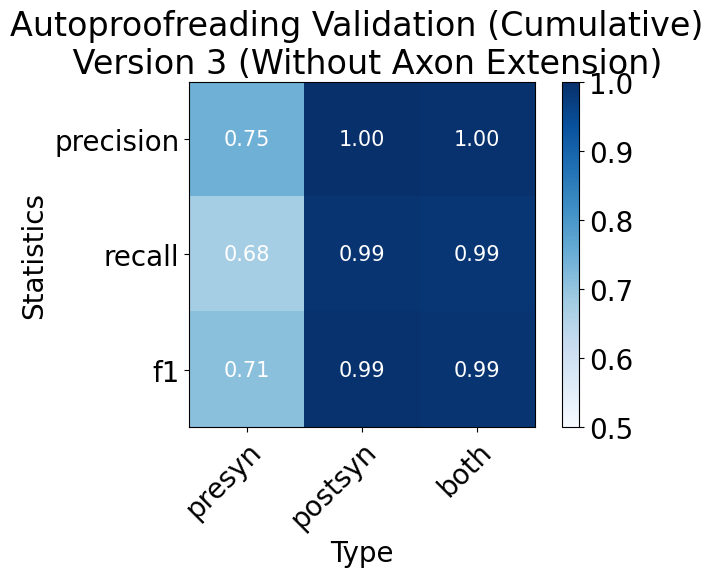

In [15]:
segment_ids = du.proofreading_stats_table(validation=True).fetch("segment_id")

validation_dfs_no_ext = [vu.synapse_validation_df_single_neuron(k,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=False) for k in segment_ids]

validation_dfs_combined = pd.concat(validation_dfs_no_ext)

vu.synapse_validation_df_to_score_plot(validation_dfs_combined,
                                      title_append=" (Without Axon Extension)")

WARNING - 2021-03-13 03:05:15,659 - font_manager - findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
WARNING - 2021-03-13 03:05:15,673 - font_manager - findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


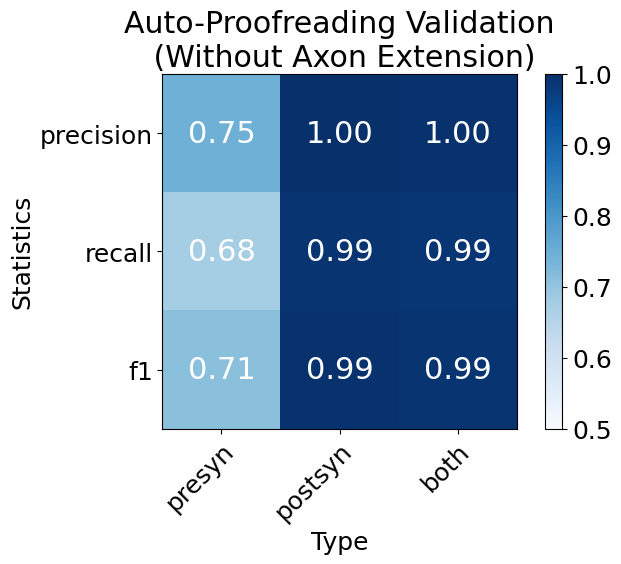

In [27]:
validation_dfs_combined = pd.concat(validation_dfs_no_ext)

vu.synapse_validation_df_to_score_plot(validation_dfs_combined,
                                       fontsize_overall=18,
                                      title_append=" (Without Axon Extension)")

# -- Graph 1 -- 

In [ ]:
du.plot_proofread_neuron(segment_id,
                        validation=True)

In [ ]:
import matplotlib.pyplot as plt

"""
Purpose: To graph a score feature against a neuron morphology statistic

Pseudocode: 
1) Get the score statistic for ever neuron
2) Get the morphological feature for every neuron
3) Plot them against each other
4) Optionally plot the histogram of each as well
"""
synapse_type = "presyn"
score_statistic = "recall"
score_tables = score_dfs
morphology_statistic = "axon_length"
verbose = True
plot_individual_histograms = True
fig_width = 5
fig_height = 5

score_statistic_name = f"{synapse_type} {score_statistic}"
morphology_statistic_name = "Axon Skeletal Length (um)"

#1) Get the score statistic for ever neuron
score_per_neuron = []
morph_per_neuron = []
for j,k in enumerate(score_tables):
    
    #get the neuron name
    curr_segment_id =k["old_segment_id"][0]
    
    curr_score = k[(k["Type"] == synapse_type)][score_statistic].to_list()[0] 
    score_per_neuron.append(curr_score)
    
    

    #2) Get the morphological feature for every neuron
    curr_morph = du.segment_id_to_autoproofread_neuron_features(segment_id = curr_segment_id,
                                                   #split_index = 0,
                                                   statistic_names = [morphology_statistic],
                                                   validation = True,
                                        )
    morph_per_neuron.append(curr_morph)
    
    if False:
        print(f"Working on neuron {j}: {score_statistic} = {curr_score}, {morphology_statistic} = {curr_morph}")

#3) Plot them against each other
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

ax.scatter(morph_per_neuron,score_per_neuron)
ax.set_xlabel(morphology_statistic_name)
ax.set_ylabel(score_statistic_name)
ax.set_title(f"")
fig.show()

if plot_individual_histograms:
    individuals_names = [morphology_statistic_name,score_statistic_name]
    individuals_data = [morph_per_neuron,score_per_neuron]
    
    for n,d in zip(individuals_names,individuals_data):
        fig, ax = plt.subplots(figsize=(fig_width, fig_height))
        ax.hist(d,bins=20)
        ax.set_xlabel(n)
        ax.set_ylabel("Count")
        ax.set_title(f"{n} frequency")
        fig.show()


# Recall Drop Off With Euclidean Distance

In [ ]:
"""
Purpose: To get the recall of each neuron (and overall)
as a function of the euclidean distance from the soma center

Pseudocode: 
a) Get the validation dataframes for all neurons (that come along with the synapse coordinates)
b) Create a range of distance restrictions based on max and min distanes
c) Create a sampling array for distances
d) Iterate through the sampliing:
   i) restrict the table to synapses under that distance
   2) Compute the recall
   3) Save in array
"""

In [ ]:
segment_ids = du.proofreading_stats_table(validation=True).fetch("segment_id")

validation_dfs = [vu.synapse_validation_df_single_neuron(k,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,) for k in segment_ids]


In [ ]:
# segment_id = 864691136008425132

# curr_mesh = du.fetch_segment_id_mesh(segment_id)
# soma_center = du.fetch_neuron_soma_center(segment_id)
# nviz.plot_objects(curr_mesh,
#                  scatters=[soma_center],
#                  scatter_size=4)


In [ ]:
cumulative_validation_df = pd.concat(validation_dfs)

In [ ]:
axon_length = 1000
curr_query = f"axon_length>{axon_length}"
curr_query_title = f"Axon Length > {axon_length} um"
seg_ids_in_query = (minnie.AutoProofreadValidationNeurons() & curr_query).fetch("segment_id")

current_validation_df = cumulative_validation_df[cumulative_validation_df["old_segment_id"].isin(seg_ids_in_query)]

vu.score_vs_euclidean_synapse_threshold_analysis(current_validation_df,
                                                title_append=f"Neurons with {curr_query_title} ({len(seg_ids_in_query)} Neurons)\n Version 3")

# Finding The Stats for Different Types of Neurons

In [ ]:
vu.score_vs_euclidean_synapse_threshold_analysis(cumulative_validation_df,
                                                title_append="Total")

# Development of the Recall Plots

In [ ]:
vu.synapse_distance_samples(cumulative_validation_df).shape

In [ ]:
score_dict,n_syn_dict = vu.compute_score_as_function_of_synapse_euclidean_distance(cumulative_validation_df)

In [ ]:
score_dict

In [ ]:
vu.plot_score_as_function_of_synapse_euclidean_distance(score_dict,
                                                     n_synapses_dict=n_syn_dict,
                                                         title_append="Total",
                                                        plot_synapse_histograms=True,
                                                       validation_df =cumulative_validation_df)

In [ ]:
synapse_dist = cumulative_validation_df["euclidean_distance_to_nuclei"].to_numpy()
_ = plt.hist(synapse_dist,bins=50)

In [ ]:
syn_distance_boundaries = [np.percentile(synapse_dist,5),np.percentile(synapse_dist,99)]
syn_distance_interval = 5000
syn_distance_samples = np.arange(*syn_distance_boundaries,syn_distance_interval)
syn_distance_samples.shape

In [ ]:
curr_score[curr_score["Type"] == s_type]["recall"].to_list()[0]

In [ ]:
recall_by_synapse_type

In [ ]:
# d) Iterate through the sampliing:
#    i) restrict the table to synapses under that distance
#    2) Compute the recall
#    3) Save in array

In [ ]:
curr_table[curr_table["synapse_type"] == "presyn"]

In [ ]:
from tqdm_utils import tqdm
validation_table = cumulative_validation_df


for synapse_type in synapse_types:

    title = f"{synapse_type.capitalize()} Recall vs Synapses Within Euclidean Threshold"
    synapse_distances = syn_distance_samples/1000

    recall_stats = recall_by_synapse_type[synapse_type]

    #3) Plot them against each other
    fig, axes = plt.subplots(1,2,figsize=(fig_width*2, fig_height))
    ax = axes[0]
    
    ax.plot(synapse_distances,recall_stats)
    ax.set_xlabel(f"Euclidean Threshold (um)")
    ax.set_ylabel(f"{synapse_type.capitalize()} Recall")
    ax.set_title(title)
    
    syn_totals = n_synapses_by_synapse_type[synapse_type]
    
    title = f"{synapse_type.capitalize()} Count vs Synapses Within Euclidean Threshold"
    ax = axes[1]
    ax.plot(synapse_distances,syn_totals)
    ax.set_xlabel(f"Euclidean Threshold (um)")
    ax.set_ylabel(f"Number of {synapse_type.capitalize()} Synapses")
    ax.set_title(title)
    
    fig.tight_layout()
    fig.show()

In [ ]:
"""
To plot the recall vs synaptic distance

"""

for synapse_type in synapse_types:

    title = f"{synapse_type.capitalize()} Recall vs Synapses Within Euclidean Threshold"
    synapse_distances = syn_distance_samples/1000

    recall_stats = recall_by_synapse_type[synapse_type]

    #3) Plot them against each other
    fig, axes = plt.subplots(1,2,figsize=(fig_width*2, fig_height))
    ax = axes[0]
    
    ax.plot(synapse_distances,recall_stats)
    ax.set_xlabel(f"Euclidean Threshold (um)")
    ax.set_ylabel(f"{synapse_type.capitalize()} Recall")
    ax.set_title(title)
    
    syn_totals = n_synapses_by_synapse_type[synapse_type]
    
    title = f"{synapse_type.capitalize()} Count vs Synapses Within Euclidean Threshold"
    ax = axes[1]
    ax.plot(synapse_distances,syn_totals)
    ax.set_xlabel(f"Euclidean Threshold (um)")
    ax.set_ylabel(f"Number of {synapse_type.capitalize()} Synapses")
    ax.set_title(title)
    
    fig.tight_layout()
    fig.show()
    

In [ ]:
minnie.AutoProofreadNeurons2() & dict(spine_category="densely_spined") & "axon_length>2000"

In [ ]:
minnie.AutoProofreadNeurons3()